In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the Dataset
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
#statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
## checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
import missingno as msno

<Axes: >

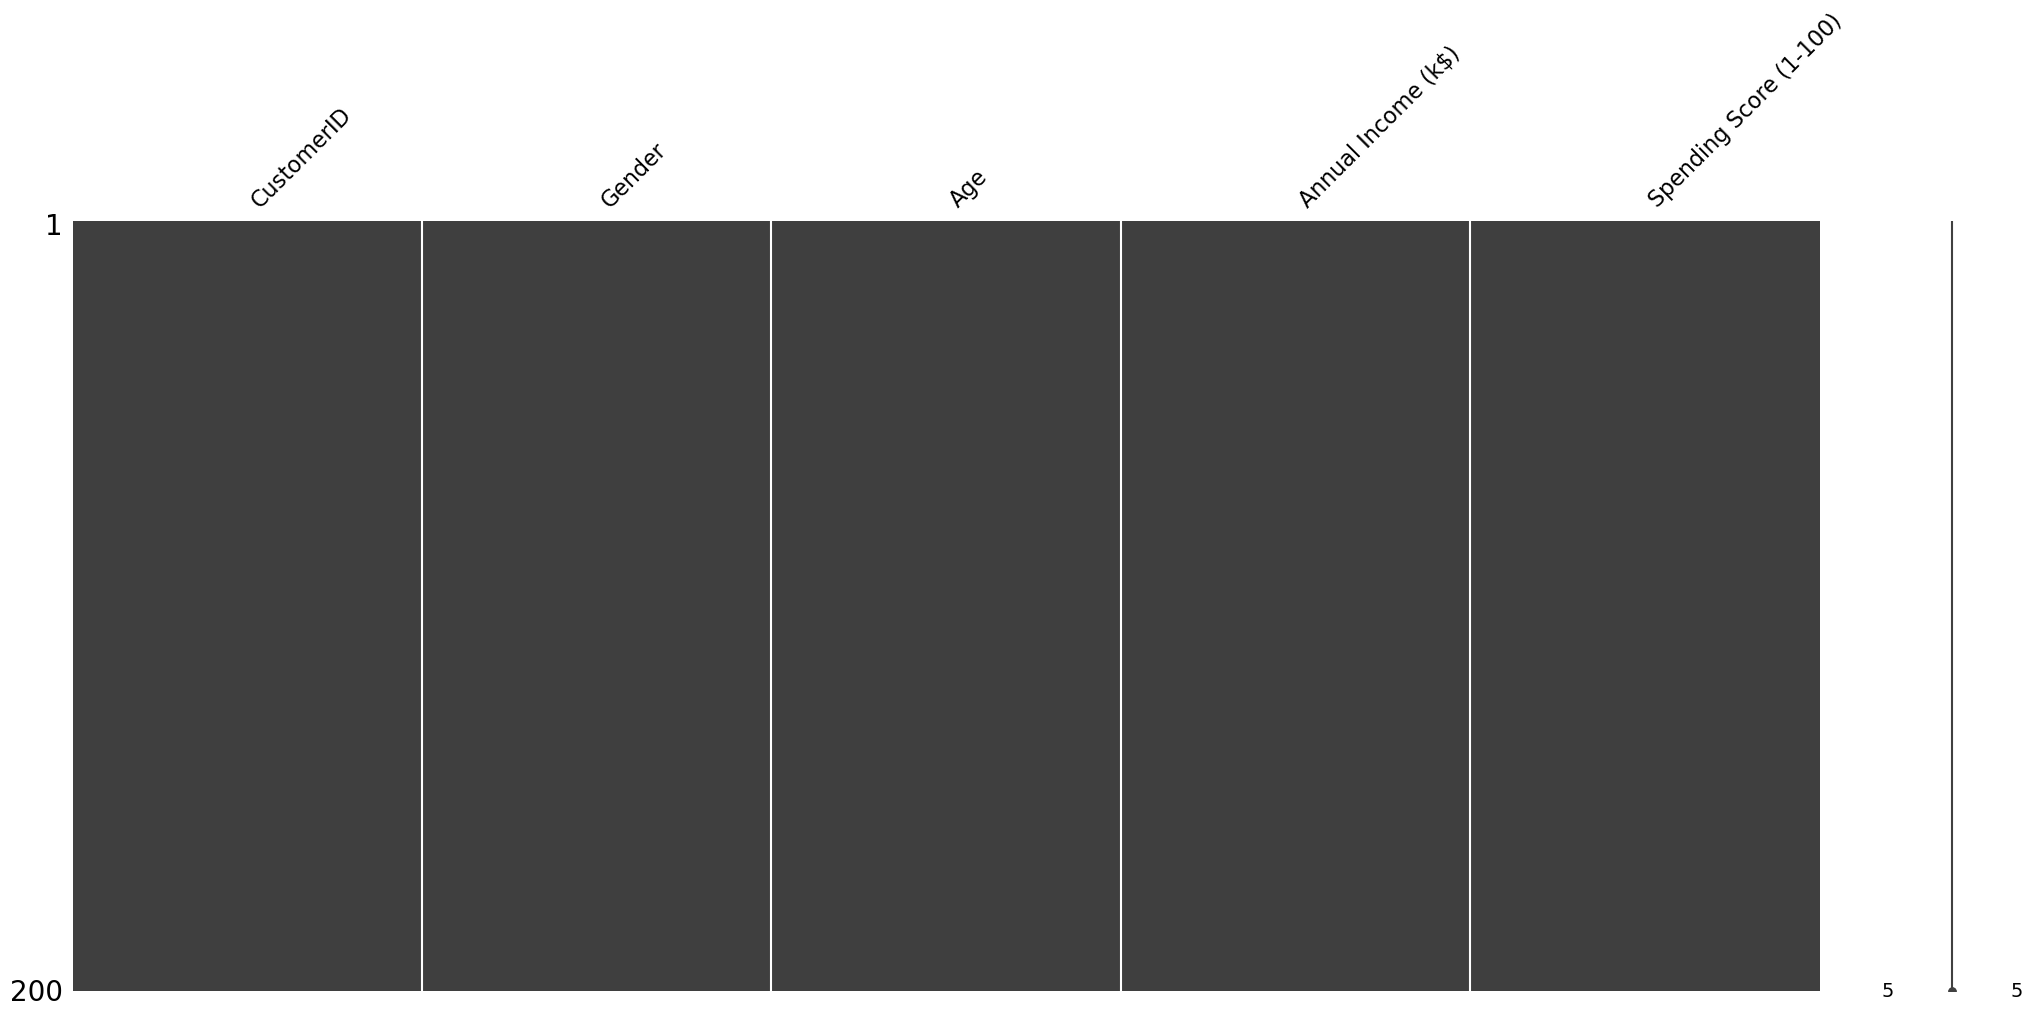

In [9]:
msno.matrix(df)

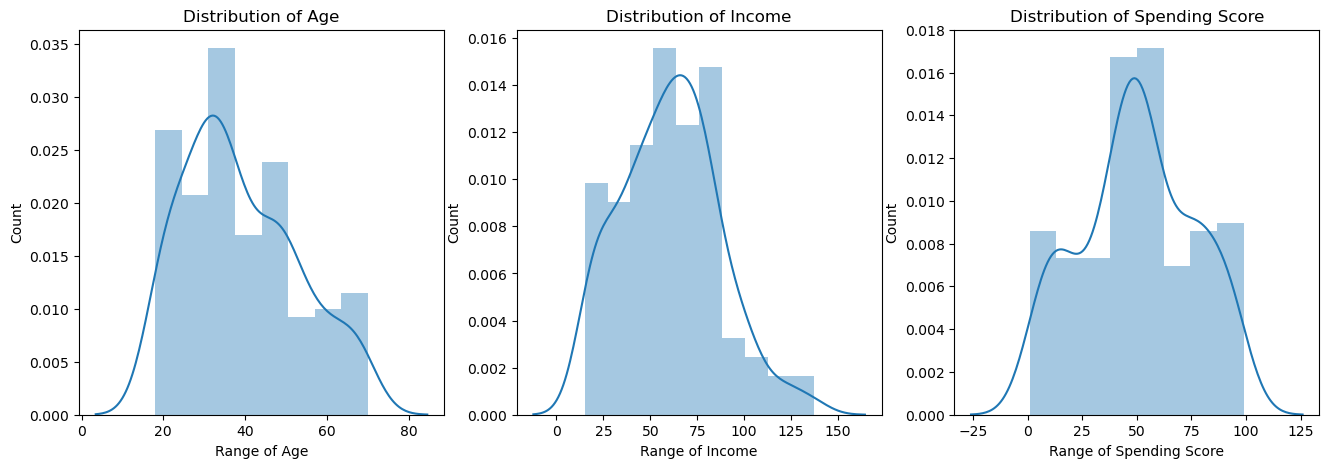

In [10]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.distplot(df['Age'])
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.distplot(df['Annual Income (k$)'])
plt.title("Distribution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.distplot(df['Spending Score (1-100)'])
plt.title("Distribution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")
plt.show()

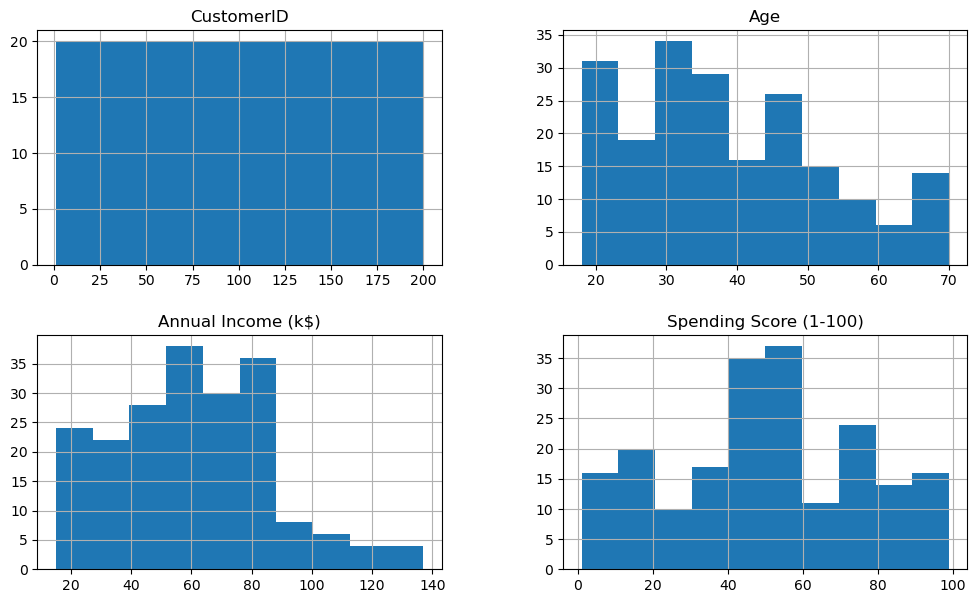

In [11]:
df.hist(figsize=(12,7))
plt.show()

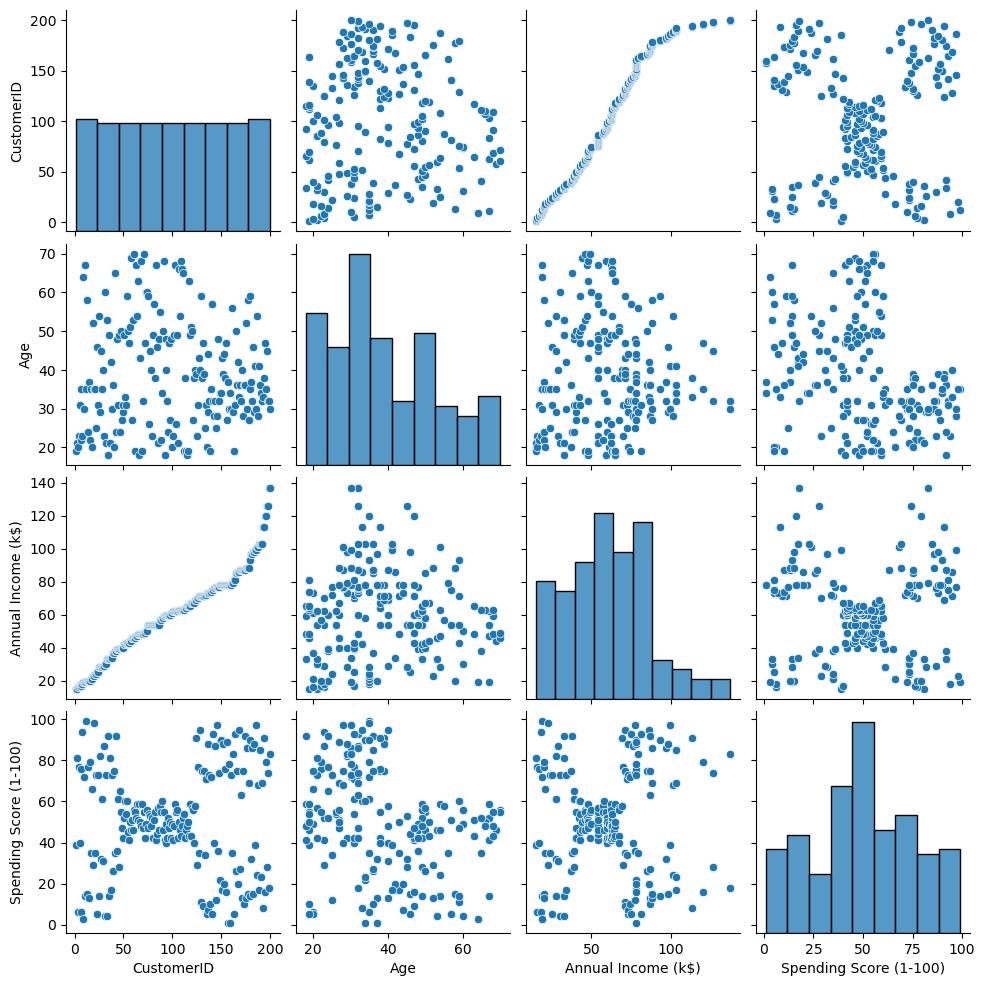

In [12]:
sns.pairplot(df)
plt.show()

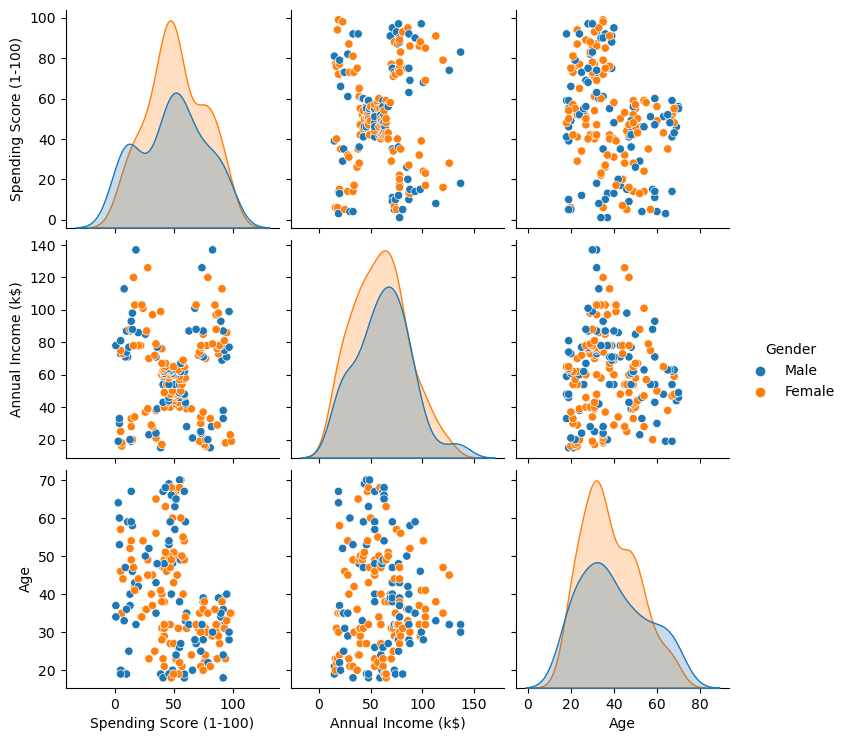

In [13]:
sns.pairplot(df,vars=['Spending Score (1-100)','Annual Income (k$)','Age'],hue='Gender')

In [14]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

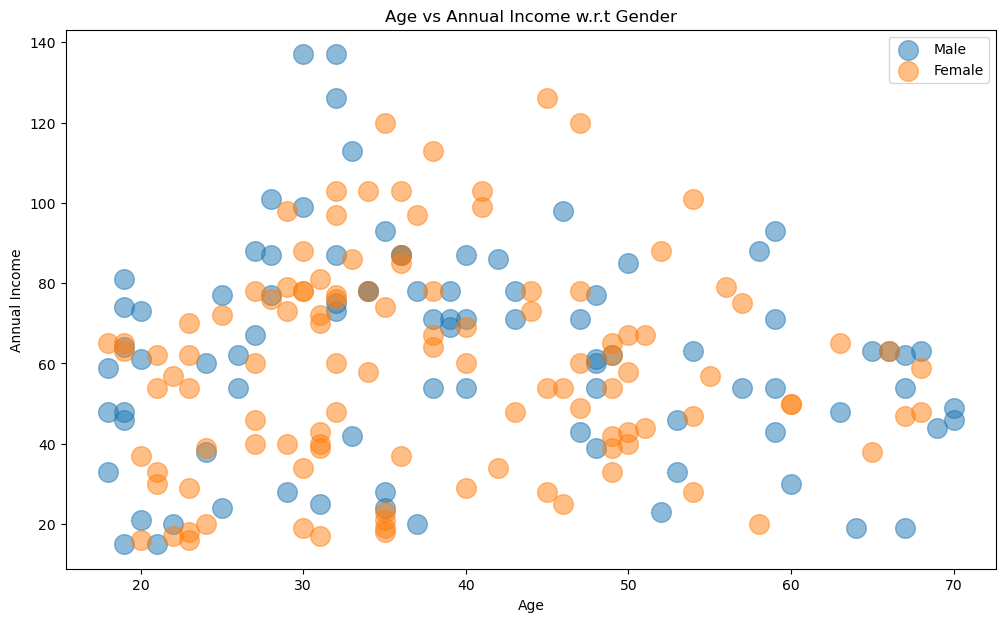

In [15]:
plt.figure(figsize=(12,7))
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data=df[df['Gender']==gender],s=200,alpha=0.5,label=gender)
    
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age vs Annual Income w.r.t Gender")
plt.legend()
plt.show()

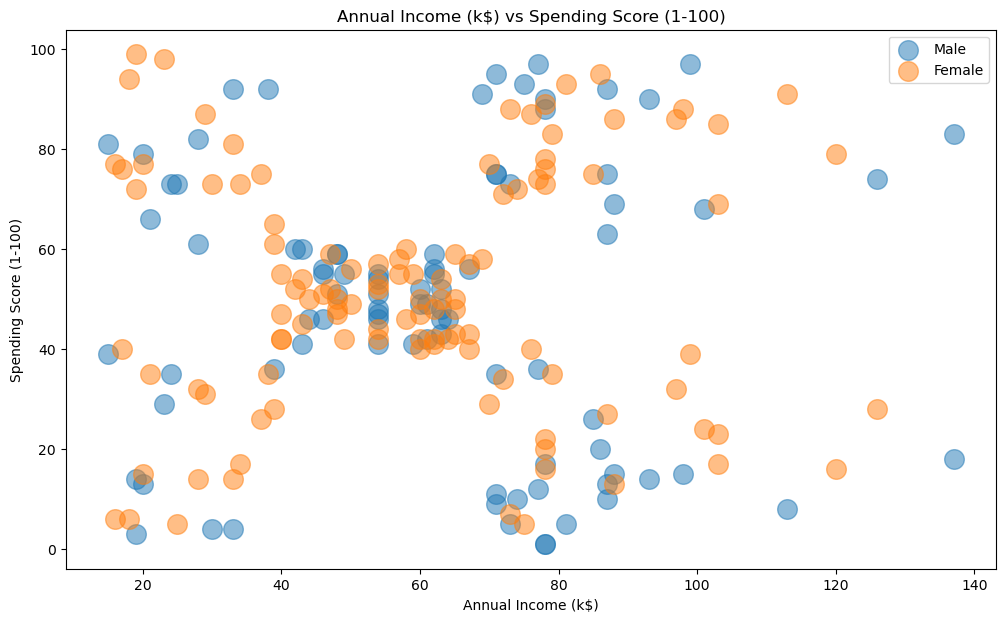

In [16]:
plt.figure(figsize=(12,7))
for gender in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df[df['Gender']==gender],s=200,alpha=0.5,label=gender)
    
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.legend()
plt.show()

<Axes: >

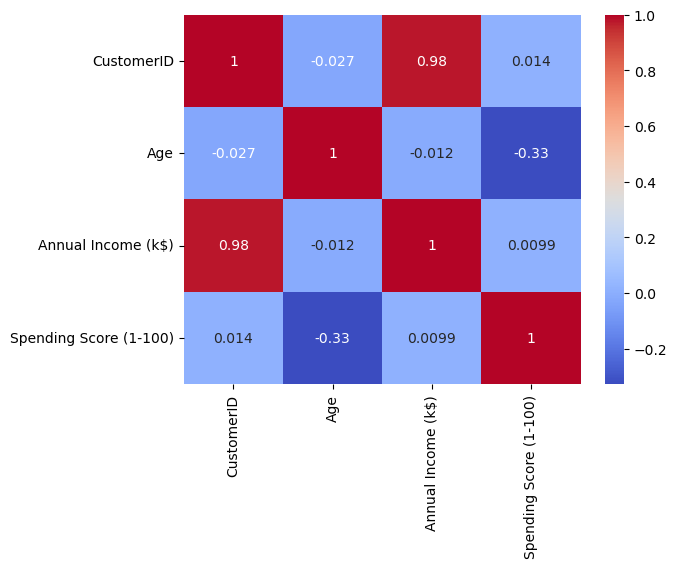

In [17]:
#Correlation Matrix
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [18]:
#Cluster on 2 features
df1=df[['Annual Income (k$)','Spending Score (1-100)']]
df1.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [28]:
# K-Means Clustering
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [19]:
from sklearn.cluster import KMeans
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

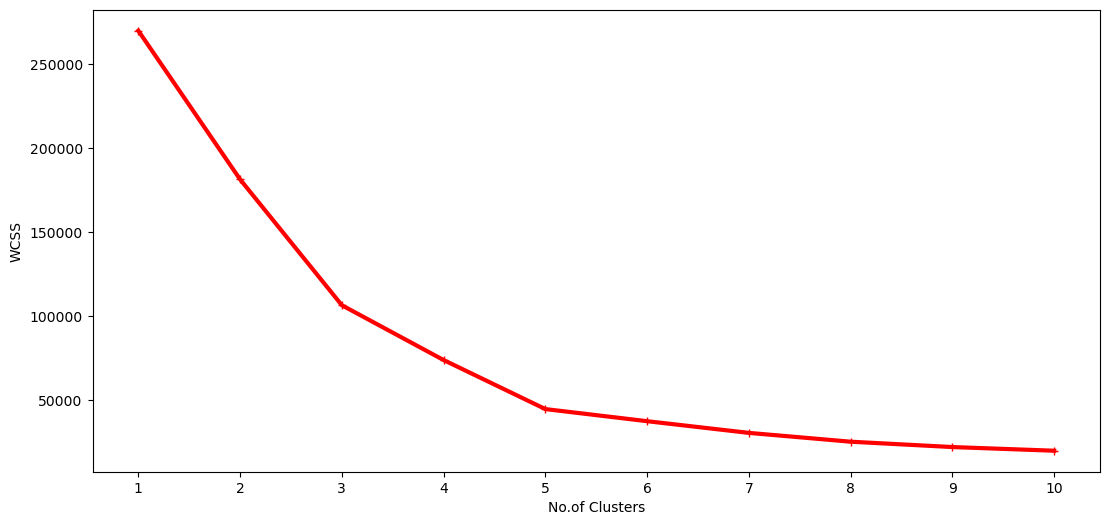

In [20]:
#plotting the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red',marker='+')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [21]:
km=KMeans(n_clusters=5)
km.fit(df1)
y=km.predict(df1)
df1['Label']=y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

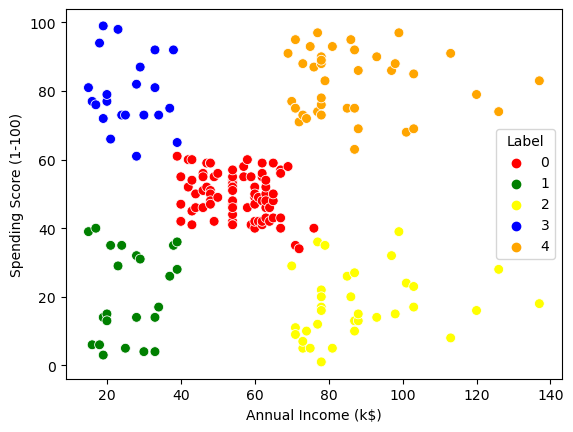

In [22]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1, hue='Label',s=50,palette=['red','green','yellow','blue','orange'])

In [23]:
#Cluster on 3 features
df2=df[['Annual Income (k$)','Spending Score (1-100)','Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [24]:
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

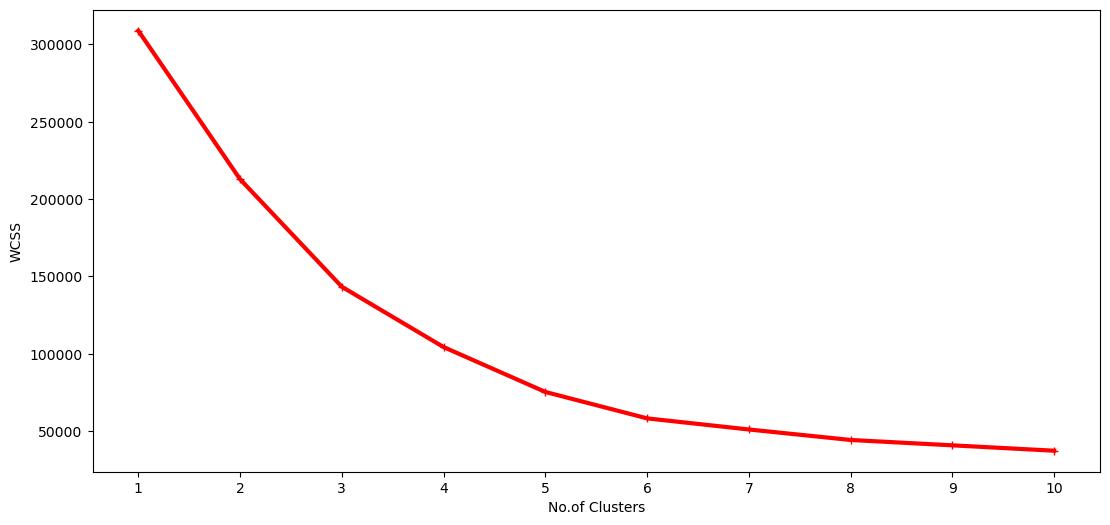

In [25]:
#plotting the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red',marker='+')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [26]:
km=KMeans(n_clusters=5)
km.fit(df2)
y=km.predict(df2)
df2['Label']=y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,3
1,15,81,21,0
2,16,6,20,3
3,16,77,23,0
4,17,40,31,3


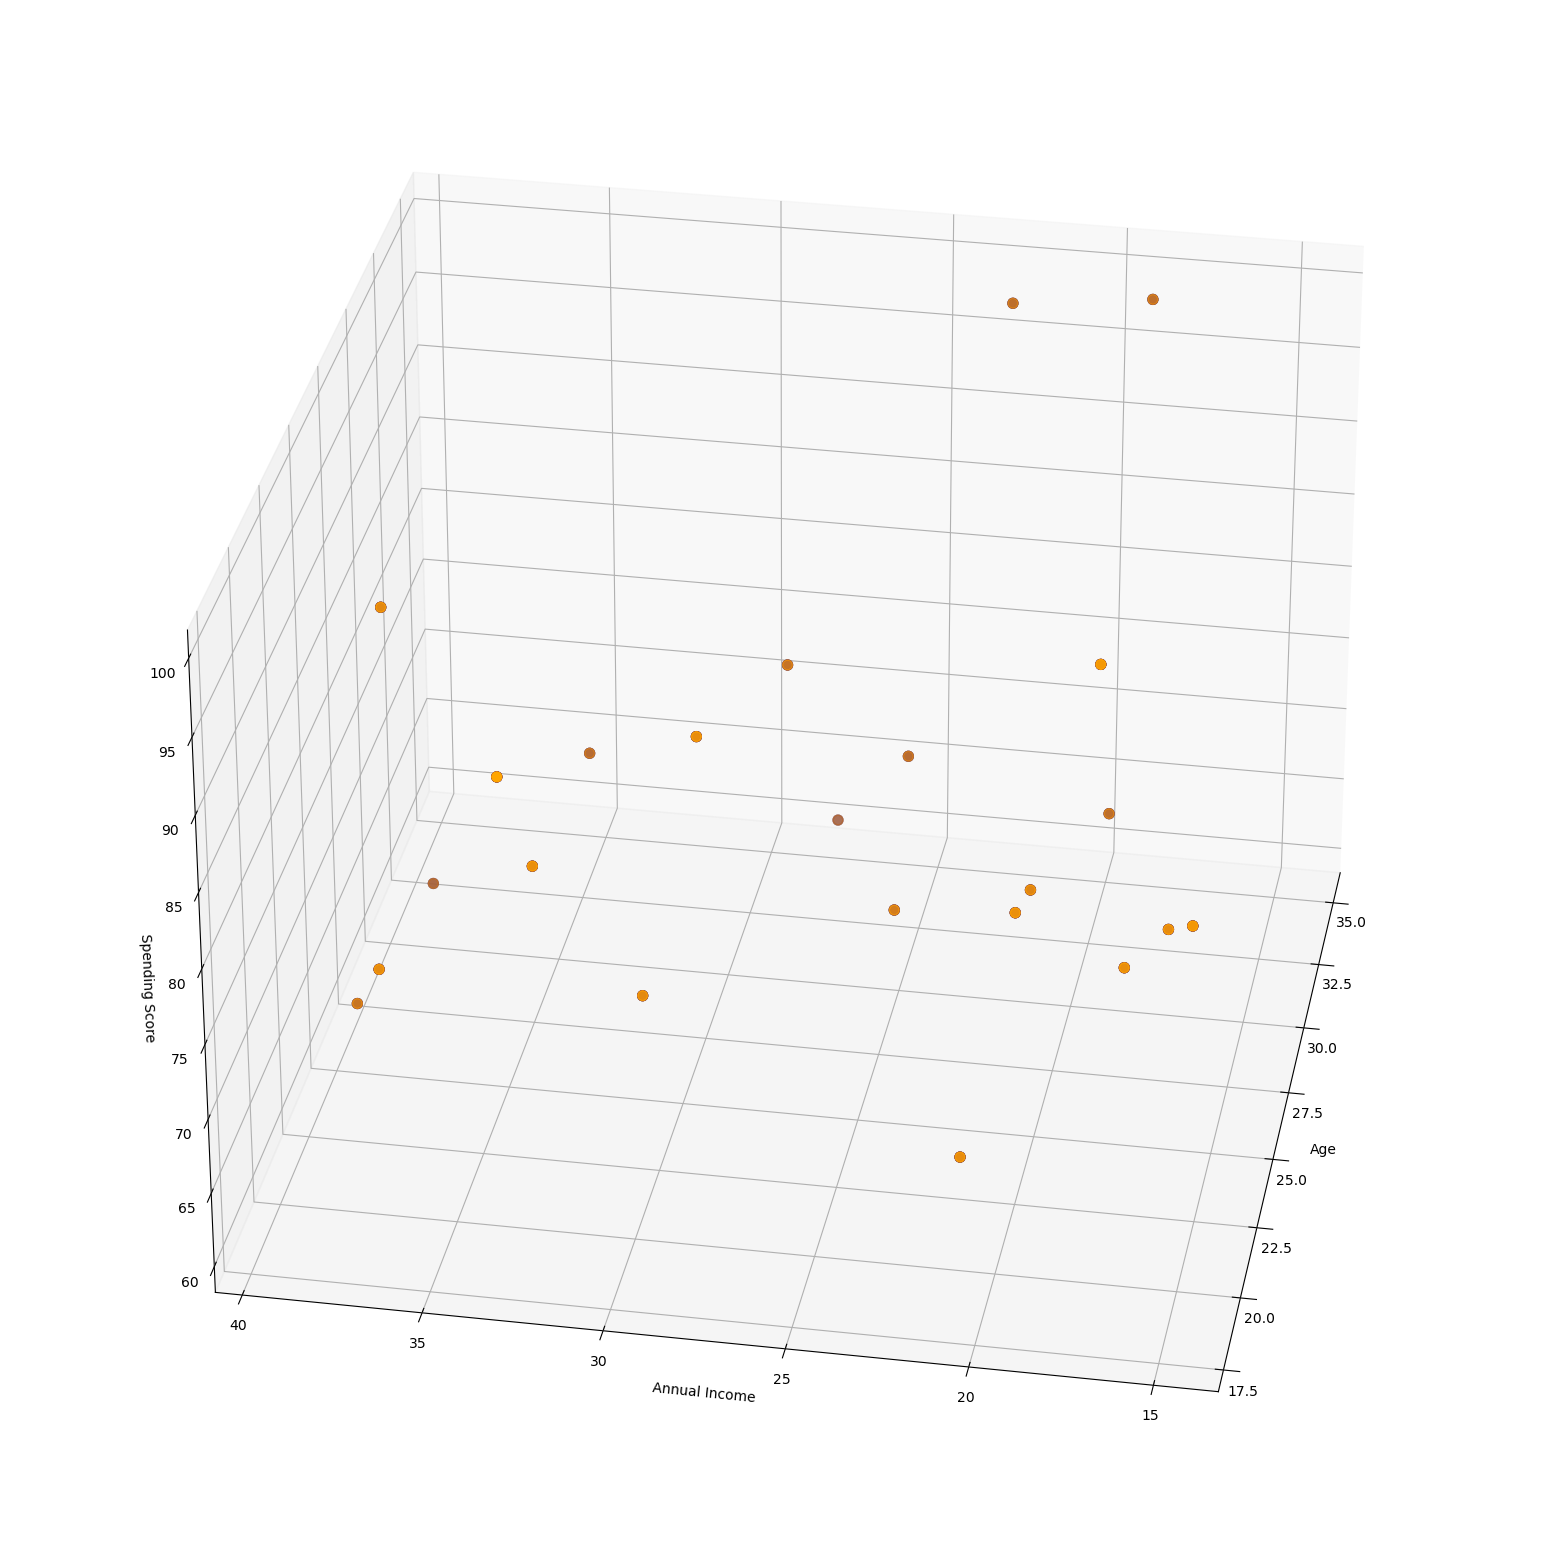

In [27]:
# 3d scatter plot
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='brown', s=50)
ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='orange', s=50)
ax.view_init(30,190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()